In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Preprocessing

In [2]:
ADS = pd.read_csv("dataset.csv")
x = ADS.drop(columns=['Cardiovascular_risk(y)'])  # Input features
y = ADS['Cardiovascular_risk(y)']  # Target variable
# Identify categorical and numerical columns
categorical_columns = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack',
                       'Smoking', 'Transportation', 'TV', 'Discipline']
numerical_columns = x.columns.difference(categorical_columns)

In [3]:
# Separate categorical and numerical features
x_train_cat = x[categorical_columns]
x_train_num = x[numerical_columns]

In [4]:

encoder = OneHotEncoder()
x_train_cat_encoded = encoder.fit_transform(x_train_cat)
# in_test_Cat_Encoded = encoder.fit_transform(in_test_Cat)
x = [iter for iter in range(10,36)]
x_train_cat_encoded = pd.DataFrame(x_train_cat_encoded.toarray(), columns= x)


scaler = StandardScaler()
x_train_num_scaled = scaler.fit_transform(x_train_num)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))

x_train_complete = np.hstack([x_train_num_scaled, x_train_cat_encoded])
x_train_complete.shape

X_train_val, X_test, y_train_val, y_test = train_test_split(x_train_complete, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(1260, 34)
(420, 34)
(420, 34)


# Visualization

In [5]:
ADS.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [6]:
ADS.describe().style.background_gradient('Blues')

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [7]:
ADS.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [8]:
ADS.duplicated().sum()

0

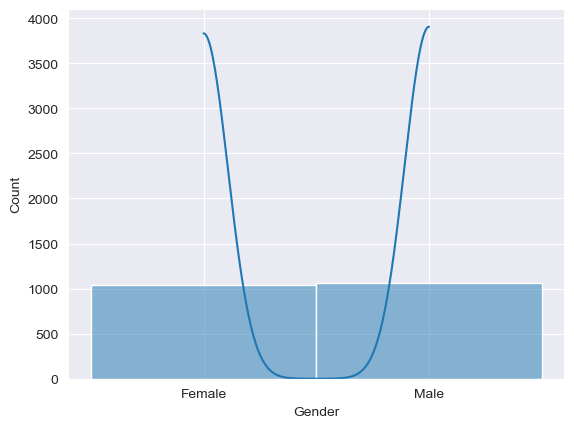

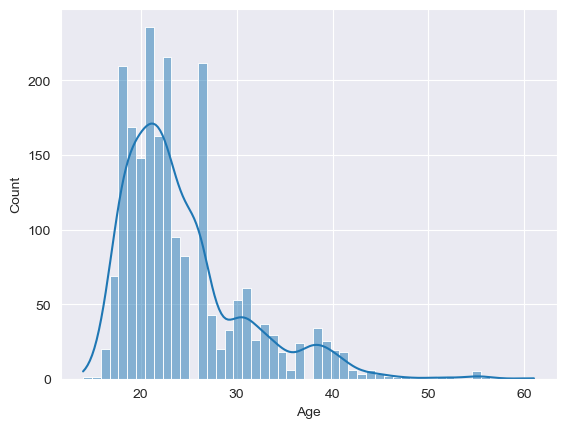

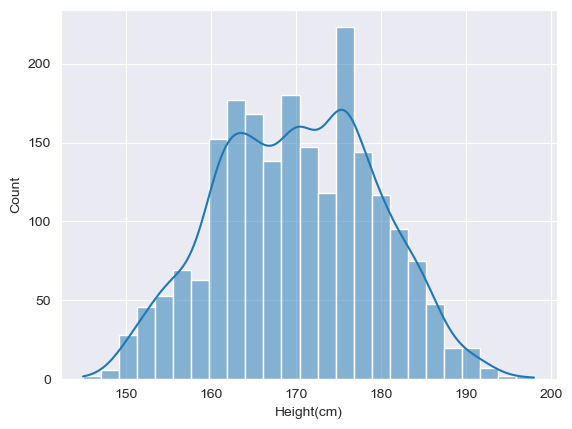

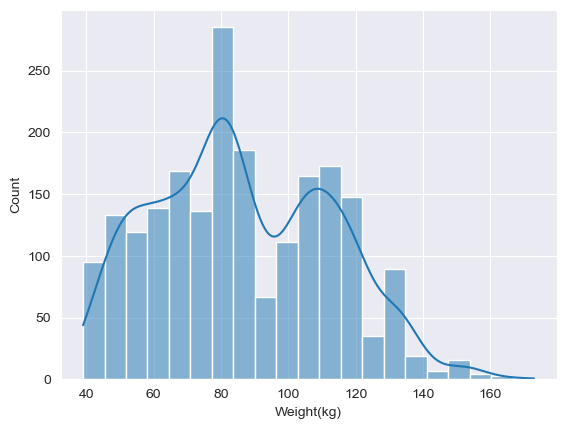

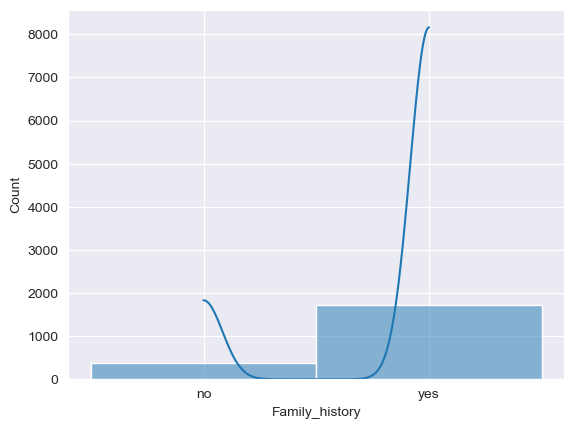

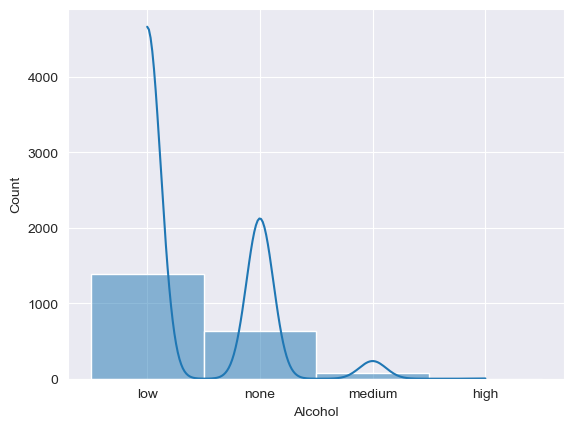

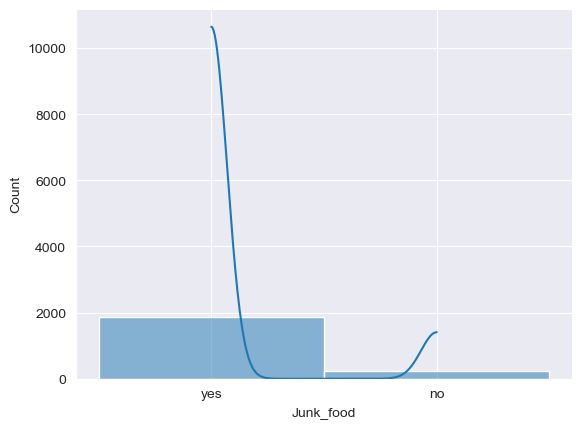

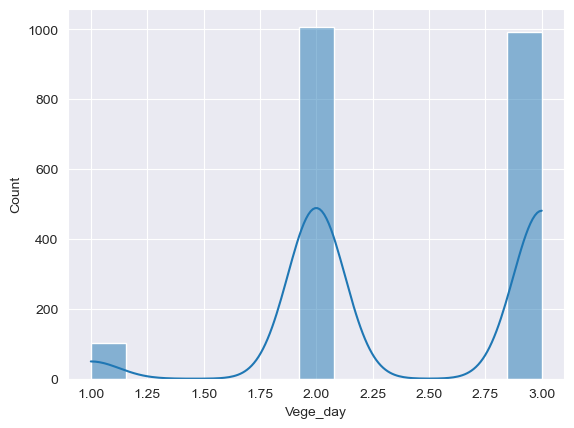

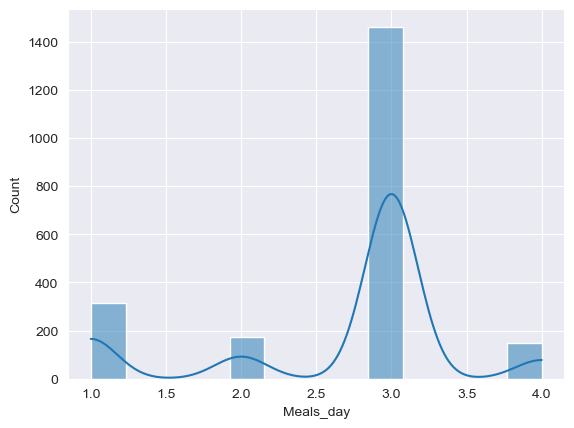

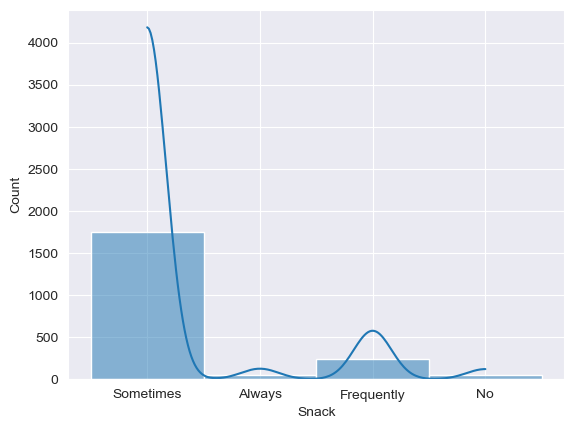

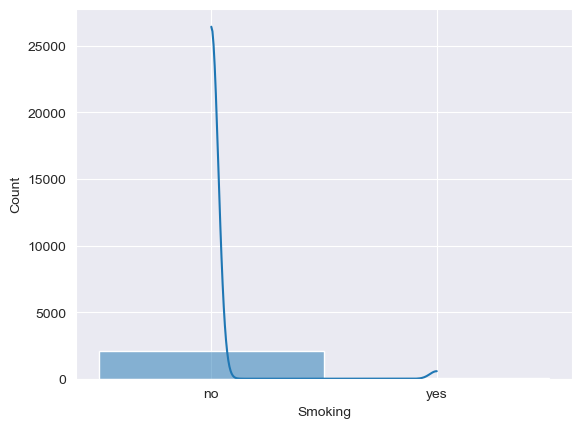

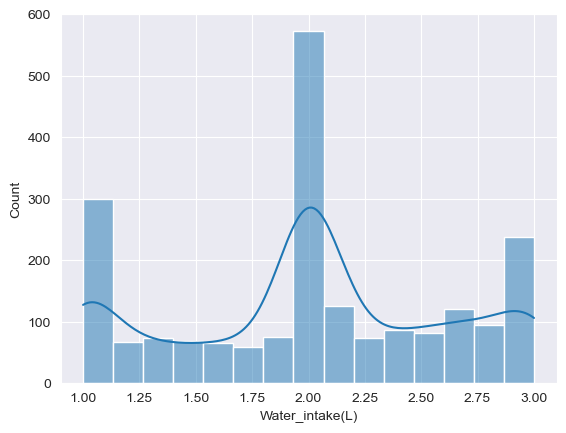

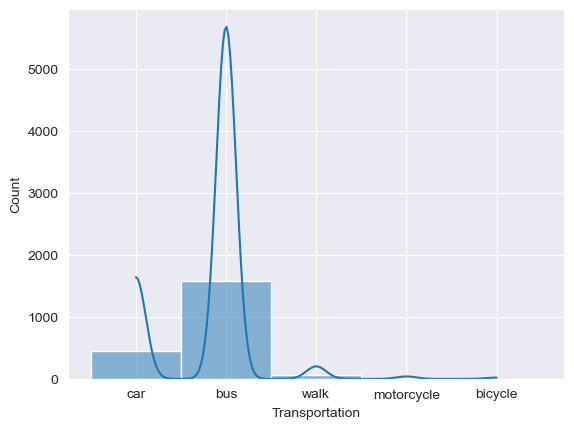

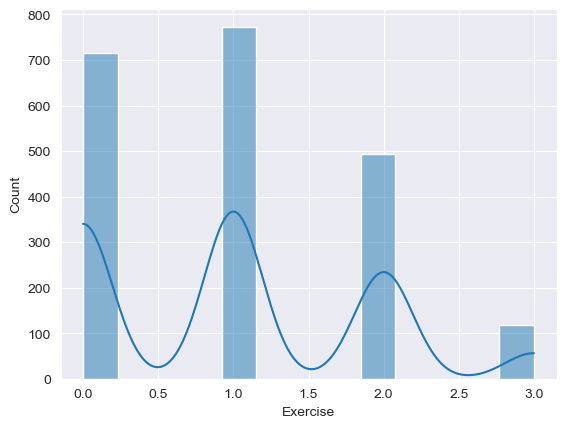

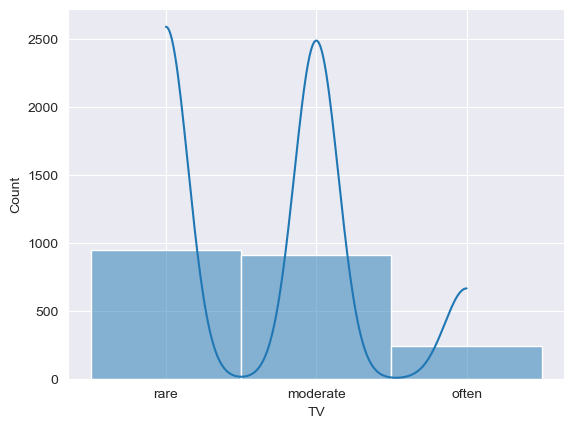

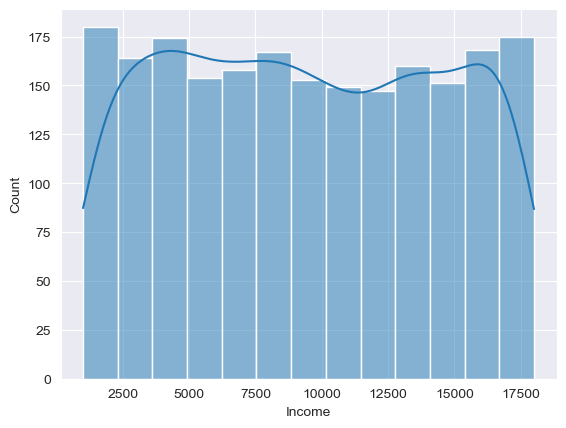

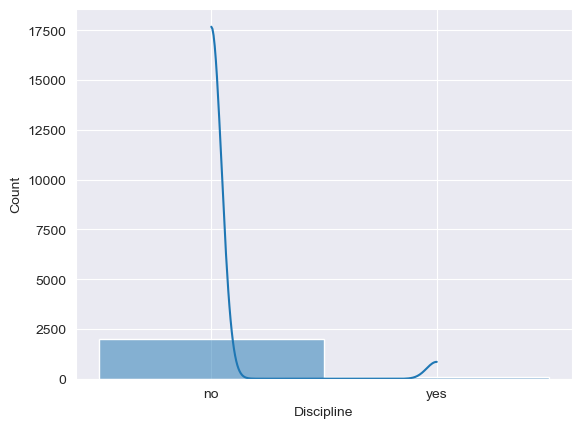

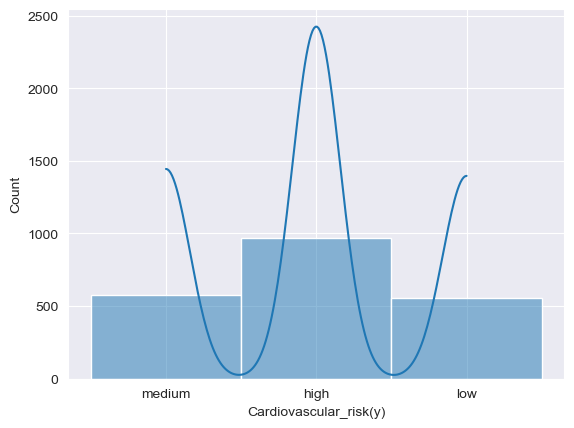

In [528]:
sns.set_style("darkgrid")

for i in ADS.columns:
    plt.subplots()
    sns.histplot(data=ADS,x=i,kde=True)
    plt.show()



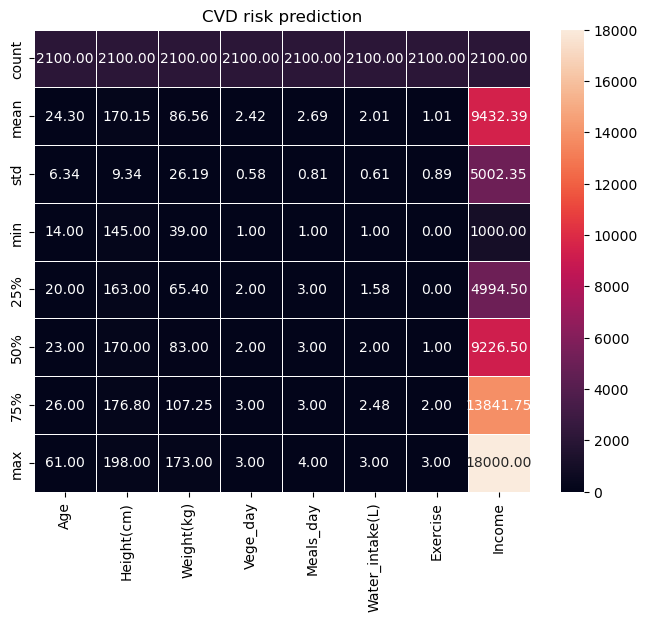

In [9]:

plt.figure(figsize=(8,6))
sns.heatmap(ADS.describe(), annot=True, fmt=".2f", linewidths=.5)  
plt.title('CVD risk prediction')
plt.show()

# Model Selection:
## MLP
## Extra Tree
## GaussianNB

by Bester Loo Man Ting 2207066


# Model Training and Validation


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
et = ExtraTreeClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

mlp.fit(X_train , y_train)
et.fit(X_train , y_train)
dt.fit(X_train , y_train)

y_pred_mlp = mlp.predict(X_train)
acc_mlp = accuracy_score(y_train, y_pred_mlp)
print("MLP training accuracy score:\t\t\t {:.4f}".format(acc_mlp))
y_pred_val_mlp = mlp.predict(X_val)
acc_val_mlp = accuracy_score(y_val, y_pred_val_mlp)
print("MLP validation accuracy score:\t\t\t {:.4f}".format(acc_val_mlp))

y_pred_et = et.predict(X_train)
acc_et = accuracy_score(y_train, y_pred_et)
print("\nExtra Tree training accuracy :\t\t\t {:.4f}".format(acc_et))
y_pred_val_et = et.predict(X_val)
acc_val_et = accuracy_score(y_val, y_pred_val_et)
print("Extra Tree validation accuracy :\t\t {:.4f}".format(acc_val_et))

y_pred_dt = dt.predict(X_train)
acc_dt = accuracy_score(y_train, y_pred_dt)
print("\nDecision Tree training accuracy :\t\t {:.4f}".format(acc_dt))
y_pred_val_dt = dt.predict(X_val)
acc_val_dt = accuracy_score(y_val, y_pred_val_dt)
print("Decision Tree validation accuracy :\t\t {:.4f}".format(acc_val_dt))

MLP training accuracy score:			 1.0000
MLP validation accuracy score:			 0.9762

Extra Tree training accuracy :			 1.0000
Extra Tree validation accuracy :		 0.8762

Decision Tree training accuracy :		 1.0000
Decision Tree validation accuracy :		 0.9524


## Classification Report
#### Report of Training classification

In [299]:
from sklearn.metrics import classification_report
print("Training Report for MLP:\n",classification_report(y_train,y_pred_mlp, target_names=label_encoder.classes_))
print("Training Report for ET\n:",classification_report(y_train,y_pred_et, target_names=label_encoder.classes_))
print("Training Report for DT\n:",classification_report(y_train,y_pred_dt, target_names=label_encoder.classes_))

Training Report for MLP:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       577
         low       1.00      1.00      1.00       338
      medium       1.00      1.00      1.00       345

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

Training Report for ET
:               precision    recall  f1-score   support

        high       1.00      1.00      1.00       577
         low       1.00      1.00      1.00       338
      medium       1.00      1.00      1.00       345

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

Training Report for DT
:               precision    recall  f1-score   support

        high       1.00      1.00      1.00       577
         low       1.00      1.00      1.00       338

#### Report of Validation Classification

In [159]:
print("Validation Report for MLP:\n",classification_report(y_val,y_pred_val_mlp, target_names=label_encoder.classes_))
print("Validation Report for ET:\n",classification_report(y_val,y_pred_val_et, target_names=label_encoder.classes_))
print("Validation Report for DT:\n",classification_report(y_val,y_pred_val_dt, target_names=label_encoder.classes_))

Validation Report for MLP:
               precision    recall  f1-score   support

        high       1.00      0.99      0.99       210
         low       0.95      0.98      0.97       101
      medium       0.95      0.95      0.95       109

    accuracy                           0.98       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.98      0.98      0.98       420

Validation Report for ET:
               precision    recall  f1-score   support

        high       0.95      0.92      0.93       210
         low       0.82      0.87      0.85       101
      medium       0.79      0.80      0.79       109

    accuracy                           0.88       420
   macro avg       0.85      0.86      0.86       420
weighted avg       0.88      0.88      0.88       420

Validation Report for DT:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99       210
         low       0.91      0.95      0.93    

## Cross Validation Scores

In [23]:
from sklearn.model_selection import cross_val_score
# 1.2k rows 3fold = 400+ rows per fold
print("Cross validation Score for MLP")
mlp_train_cvc = cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy") 
print("Training Scores: \n", mlp_train_cvc)
print(f"Training Mean: {np.array(mlp_train_cvc).mean():.4f}")
mlp_val_cvc = cross_val_score(mlp, X_val, y_val, cv=3, scoring="accuracy") 
print("Validation Scores: \n", mlp_val_cvc)
print(f"Validation Mean:{np.array(mlp_val_cvc).mean():.4f}")

print("\nCross validation Score for Extra Tree Classifier")
et_train_cvc = cross_val_score(et, X_train, y_train, cv=3, scoring="accuracy")
print("Training Scores: \n", et_train_cvc)
print(f"Training Mean: {np.array(et_train_cvc).mean():.4f}")
et_val_cvc = cross_val_score(et, X_val, y_val, cv=3, scoring="accuracy") 
print("Validation Scores: \n", et_val_cvc)
print(f"Validation Mean:{np.array(et_val_cvc).mean():.4f}")

print("\nCross validation Score for Decision Tree Classifier")
dt_train_cvc = cross_val_score(dt, X_train, y_train, cv=3, scoring="accuracy")
print("Training Scores: \n", dt_train_cvc)
print(f"Training Mean: {np.array(dt_train_cvc).mean():.4f}")
dt_val_cvc = cross_val_score(et, X_val, y_val, cv=3, scoring="accuracy") 
print("Validation Scores: \n", dt_val_cvc)
print(f"Validation Mean:{np.array(dt_val_cvc).mean():.4f}")

Cross validation Score for MLP
Training Scores: 
 [0.97857143 0.97619048 0.98333333]
Training Mean: 0.9794
Validation Scores: 
 [0.94285714 0.92142857 0.92857143]
Validation Mean:0.9310

Cross validation Score for Extra Tree Classifier
Training Scores: 
 [0.83809524 0.80238095 0.80714286]
Training Mean: 0.8159
Validation Scores: 
 [0.83571429 0.77857143 0.73571429]
Validation Mean:0.7833

Cross validation Score for Decision Tree Classifier
Training Scores: 
 [0.93095238 0.97380952 0.95714286]
Training Mean: 0.9540
Validation Scores: 
 [0.83571429 0.77857143 0.73571429]
Validation Mean:0.7833


## Confusion Matrices (Training and Validation)

### Confusion Matrix for MLP

In [135]:


y_pred_cv_train_mlp = cross_val_predict(mlp, X_train, y_train, cv=3)
cm_train_mlp = confusion_matrix(y_train, y_pred_cv_train_mlp)
print("Confusion Matrix for MLP training set:\n",cm_train_mlp)
y_pred_cv_val_mlp = cross_val_predict(mlp, X_val, y_val, cv=3)
cm_val_mlp = confusion_matrix(y_val, y_pred_cv_val_mlp)
print("Confusion Matrix for MLP validation set:\n",cm_val_mlp)


Confusion Matrix for MLP training set:
 [[572   0   5]
 [  0 328  10]
 [  3   8 334]]
Confusion Matrix for MLP validation set:
 [[201   0   9]
 [  0  90  11]
 [  4   5 100]]


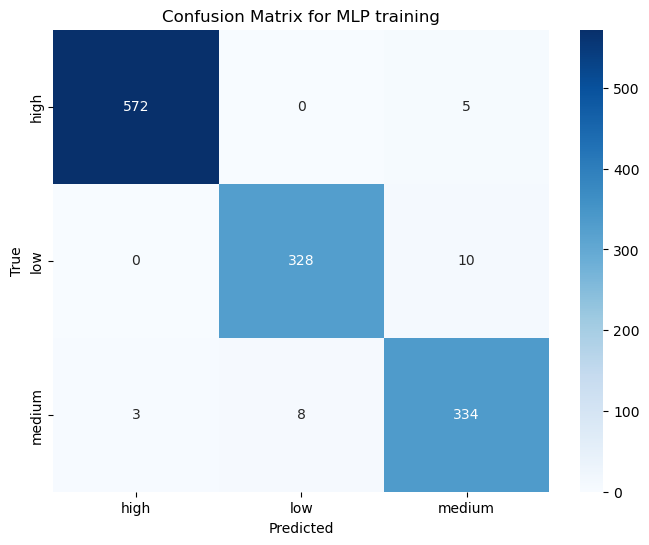

In [374]:
conf_matrix = confusion_matrix(y_train, y_pred_cv_train_mlp)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP training')
plt.show()

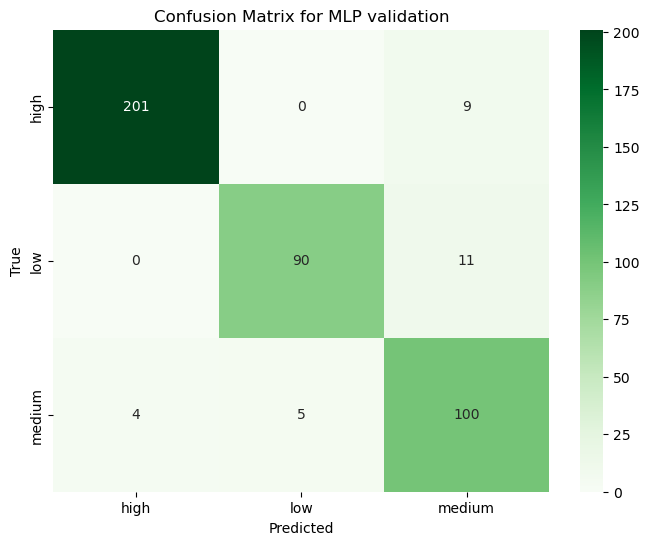

In [375]:
conf_matrix = confusion_matrix(y_val, y_pred_cv_val_mlp)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP validation')
plt.show()

### Confusion Matrix for Extra Tree Classifier

In [25]:
y_pred_cv_train_et = cross_val_predict(et, X_train, y_train, cv=3)
cm_train_et = confusion_matrix(y_train, y_pred_cv_train_et)
print("Confusion Matrix for Extra Tree Classifier training set:\n",cm_train_et)
y_pred_cv_val_et = cross_val_predict(et, X_val, y_val, cv=3)
cm_val_et = confusion_matrix(y_val, y_pred_cv_val_et)
print("Confusion Matrix for Extra Tree Classifier validation set:\n",cm_val_et)

Confusion Matrix for Extra Tree Classifier training set:
 [[515  18  44]
 [ 14 258  66]
 [ 43  47 255]]
Confusion Matrix for Extra Tree Classifier validation set:
 [[188   3  19]
 [  8  73  20]
 [ 30  11  68]]


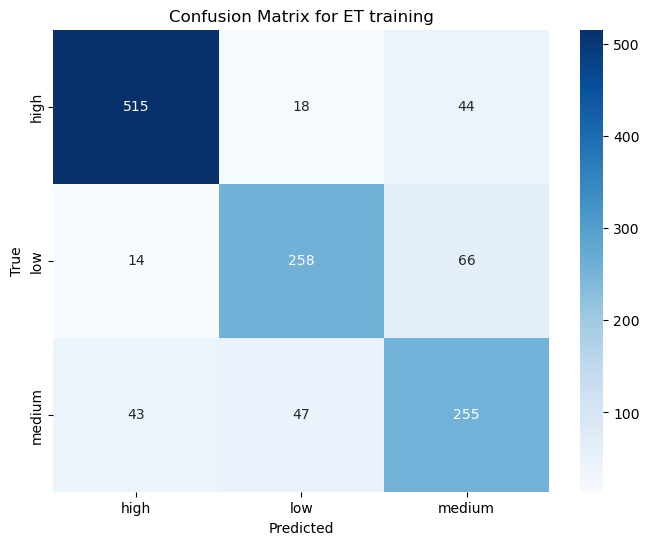

In [26]:
conf_matrix = confusion_matrix(y_train, y_pred_cv_train_et)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ET training')
plt.show()

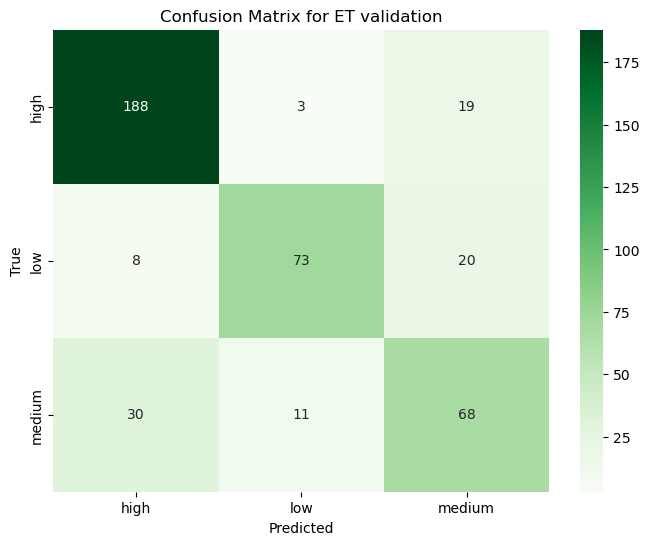

In [27]:
conf_matrix = confusion_matrix(y_val, y_pred_cv_val_et)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ET validation')
plt.show()

### Confusion Matrix for Decision Tree Classifier

In [370]:
y_pred_cv_train_dt = cross_val_predict(dt, X_train, y_train, cv=3)
cm_train_dt = confusion_matrix(y_train, y_pred_cv_train_dt)
print("Confusion Matrix for Decision Tree Classifier Training set:\n",cm_train_dt)
y_pred_cv_val_dt = cross_val_predict(dt, X_val, y_val, cv=3)
cm_val_dt = confusion_matrix(y_val, y_pred_cv_val_dt)
print("Confusion Matrix for Decision Tree Classifier Validation:\n",cm_val_dt)

Confusion Matrix for Decision Tree Classifier Training set:
 [[567   0  10]
 [  0 321  17]
 [ 16  15 314]]
Confusion Matrix for Decision Tree Classifier Validation:
 [[198   1  11]
 [  0  88  13]
 [  9  11  89]]


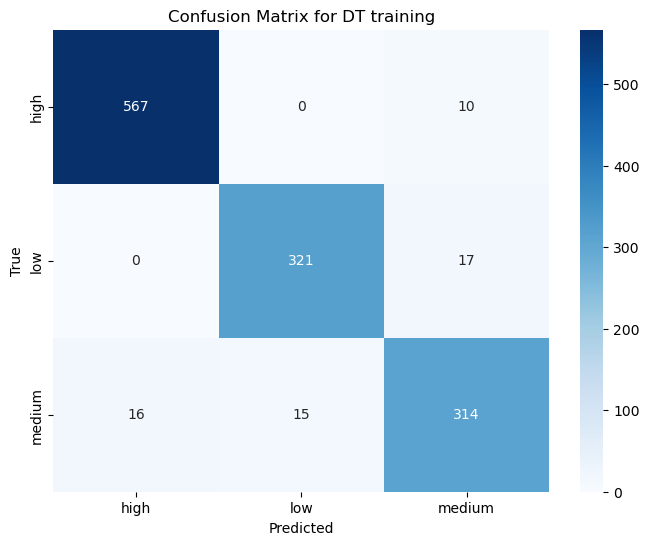

In [371]:
conf_matrix = confusion_matrix(y_train, y_pred_cv_train_dt)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DT training')
plt.show()

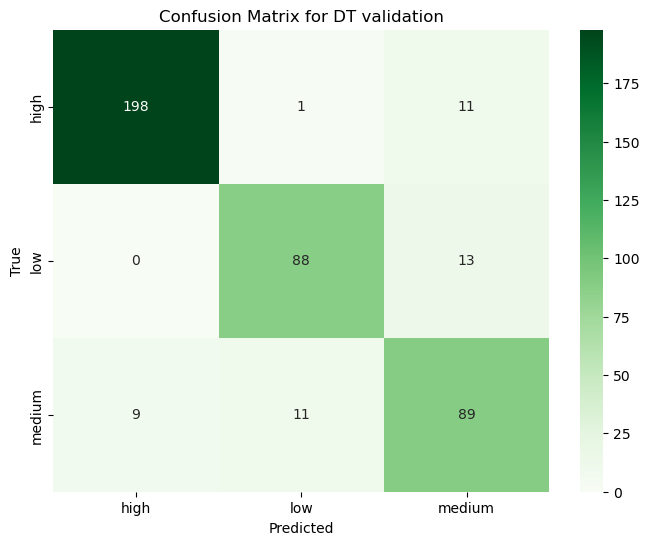

In [373]:
conf_matrix = confusion_matrix(y_val, y_pred_cv_val_dt)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DT validation')
plt.show()

### Accuracy, Precision, Recall and F1 Score for Training

### MLP

In [464]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_mlp, average='weighted')

print(f'Training Weighted Precision: {precision_train:.4f}')
print(f'Training Weighted Recall: {recall_train:.4f}')
print(f'Training Weighted F1 Score: {f1_train:.4f}')

Training Weighted Precision: 1.0000
Training Weighted Recall: 1.0000
Training Weighted F1 Score: 1.0000


### ET

In [12]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_et, average='weighted')

print(f'Training Weighted Precision: {precision_train:.4f}')
print(f'Training Weighted Recall: {recall_train:.4f}')
print(f'Training Weighted F1 Score: {f1_train:.4f}')

Training Weighted Precision: 1.0000
Training Weighted Recall: 1.0000
Training Weighted F1 Score: 1.0000


### DT

In [466]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_dt, average='weighted')

print(f'Training Weighted Precision: {precision_train:.4f}')
print(f'Training Weighted Recall: {recall_train:.4f}')
print(f'Training Weighted F1 Score: {f1_train:.4f}')

Training Weighted Precision: 1.0000
Training Weighted Recall: 1.0000
Training Weighted F1 Score: 1.0000


## Hyperparameter tuning

### Grid Search for MLP

In [134]:

param_grid_mlp = [{
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}] #parameter grid for MLP
gsearch_mlp = GridSearchCV(mlp, param_grid_mlp, cv=10, scoring = 'balanced_accuracy')
print('Performing grid search for MLP...', end = " ")
gsearch_mlp.fit(X_train, y_train)
print('done')
print('Best Parameters for MLP : ', gsearch_mlp.best_params_)
print()





Performing grid search for MLP... done
Best Parameters for MLP :  {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'sgd'}



### Grid Search for ET

In [13]:
param_grid_et = [{
    'max_depth' : [13,17,23,29, 34,50],
    'min_samples_split' : [2,4,6,10,15,19],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features': ['sqrt','log2', None],
    'ccp_alpha' : [0.01,0.1],
    'criterion' :['gini', 'entropy', 'log_loss']
}]
gsearch_et = GridSearchCV(et, param_grid_et, cv=10, scoring='balanced_accuracy')
print('Performing grid search for ET...', end = " ")
gsearch_et.fit(X_train, y_train)
print('done')
print('Best Parameters for ET : ', gsearch_et.best_params_)
print()

Performing grid search for ET... done
Best Parameters for ET :  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}



### Grid Search for DT

In [322]:
param_grid_dt = [{
            'max_depth' : [13,17,23,29, 34,50],
    'min_samples_split' : [2,4,6,10,15,19],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features': ['sqrt','log2', None],
    'ccp_alpha' : [0.001,0.01,0.1],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'splitter' : ['best','random']
             }]
gsearch_dt = GridSearchCV(dt, param_grid_dt, cv=10, scoring='balanced_accuracy')
print('Performing grid search for DT...', end = " ")
gsearch_dt.fit(X_val, y_val)
print('done')
print('Best Parameters for DT : ', gsearch_dt.best_params_)

Performing grid search for DT... done
Best Parameters for DT :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


# 5.Testing 

### Using the best parameter from GridsearchCV
## Model 1 : tuned MLP

In [378]:
best_mlp = MLPClassifier( activation= 'tanh', alpha= 0.001, hidden_layer_sizes=(64,32),learning_rate='adaptive', solver= 'sgd', max_iter=3000)
mlp.fit(X_test, y_test)
y_pred_test_mlp = mlp.predict(X_test)
acc_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
print("MLP testing accuracy score:\t\t\t {:.4f}".format(acc_test_mlp))
best_mlp.fit(X_test, y_test)
y_pred_test_best_mlp = best_mlp.predict(X_test)
acc_test_best_mlp = accuracy_score(y_test, y_pred_test_best_mlp)
print("Tuned MLP testing accuracy score:\t\t {:.4f}".format(acc_test_best_mlp))


MLP testing accuracy score:			 1.0000
Tuned MLP testing accuracy score:		 0.9976


#### Cross validation score for tuned MLP

In [463]:
mlp_test_cvc = cross_val_score(mlp, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("MLP testing Scores: \n", mlp_test_cvc)
print(f"MLP testing Scores Mean: {np.array(mlp_test_cvc).mean():.4f}")
best_mlp_test_cvc = cross_val_score(best_mlp, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("Tuned MLP Testing Scores: \n", best_mlp_test_cvc)
print(f"Tuned MLP Testing Scores Mean: {np.array(best_mlp_test_cvc).mean():.4f}")

MLP testing Scores: 
 [0.94100479 0.86574943 0.91111111]
MLP testing Scores Mean: 0.9060
Tuned MLP Testing Scores: 
 [0.93329164 0.94142172 0.94166667]
Tuned MLP Testing Scores Mean: 0.9388


#### Classification Report for tuned MLP

In [390]:
print("Testing Classification Report for MLP:\n",classification_report(y_test,y_pred_test_best_mlp, target_names=label_encoder.classes_))

Testing Classification Report for MLP:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       180
         low       0.99      1.00      1.00       118
      medium       1.00      0.99      1.00       122

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



#### Confusion Matrix for MLP on test set

In [413]:
y_pred_cv_test_mlp = cross_val_predict(mlp, X_test, y_test, cv=3)
cm_test_mlp = confusion_matrix(y_test, y_pred_cv_test_mlp)
print("Confusion Matrix for MLP test set:\n",cm_test_mlp)
y_pred_cv_test_best_mlp = cross_val_predict(best_mlp, X_test, y_test, cv=3)
cm_test_best_mlp = confusion_matrix(y_test, y_pred_cv_test_best_mlp)
print("Confusion Matrix for tuned MLP test set:\n",cm_test_best_mlp)

Confusion Matrix for MLP test set:
 [[179   0   1]
 [  0  97  21]
 [  3   9 110]]
Confusion Matrix for tuned MLP test set:
 [[180   0   0]
 [  0 110   8]
 [  2   6 114]]


#### Confusion Matrix MLP on test set

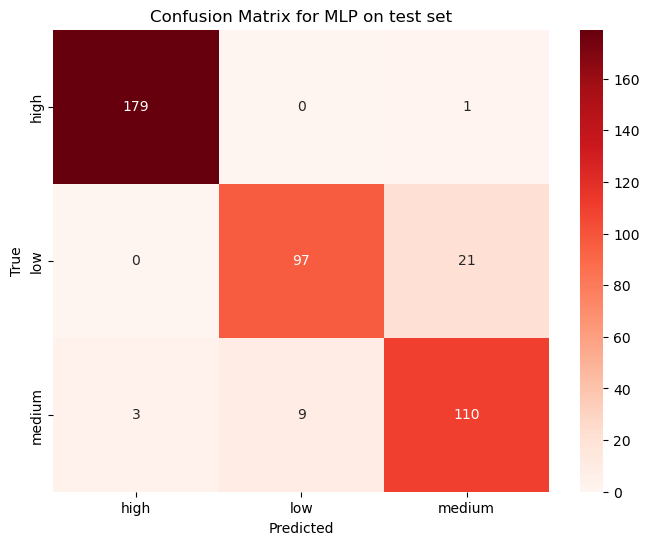

In [397]:
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP on test set')
plt.show()

#### Confusion Matrix tuned MLP on test set

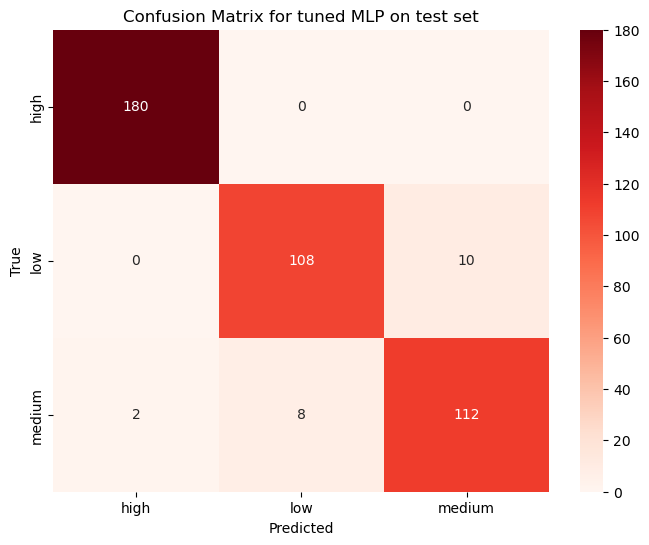

In [401]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_best_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for tuned MLP on test set')
plt.show()

#### Tuned MLP Accuracy Precision Recall and F1 on test set

In [517]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_test, y_pred_test_best_mlp, average='weighted')

print(f'Testing Weighted Precision for Tuned MLP: {precision_train:.4f}')
print(f'Testing Weighted Recall for Tuned MLP: {recall_train:.4f}')
print(f'Testing Weighted F1 Score for Tuned MLP: {f1_train:.4f}')

Testing Weighted Precision for Tuned MLP: 0.9976
Testing Weighted Recall for Tuned MLP: 0.9976
Testing Weighted F1 Score for Tuned MLP: 0.9976


#### PRC for MLP

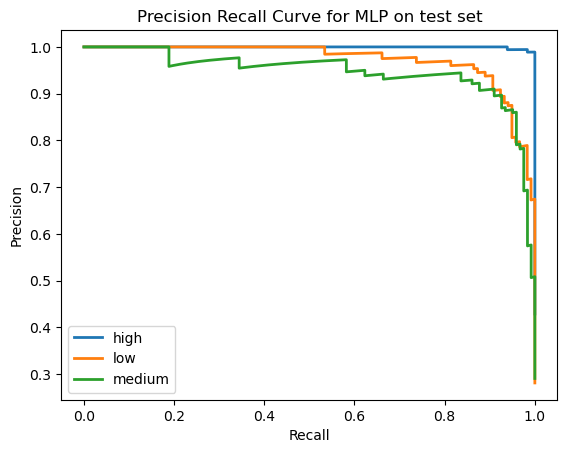

In [399]:

# Generate predictions on the test set
def plot_precision_recall_curve(clf, X_train, y_train,encoder, title,cv=5):
    class_names = clf.classes_
    legend = encoder.classes_
    y_train_bin = label_binarize(y_train, classes=class_names)

    y_score_cv = cross_val_predict(clf, X_train, y_train, cv=cv, method="predict_proba")

    precision = dict()
    recall = dict()

    for i in range(y_train_bin.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i], y_score_cv[:, i])

    plt.figure()
    for i in range(y_train_bin.shape[1]):
        plt.plot(recall[i], precision[i], lw=2, label=f'{legend[i]}')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

plot_precision_recall_curve(mlp,X_test, y_test, label_encoder, 'Precision Recall Curve for MLP on test set')

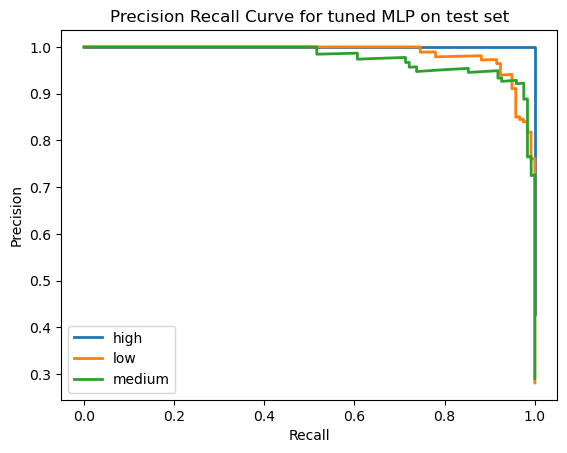

In [400]:
plot_precision_recall_curve(best_mlp,X_test, y_test, label_encoder, 'Precision Recall Curve for tuned MLP on test set')

In [494]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(clf, X_train, y_train,encoder,title ,cv=5):
    class_names = clf.classes_
    legend = encoder.classes_
    y_train_bin = label_binarize(y_train, classes=class_names)

    y_score_cv = cross_val_predict(clf, X_train, y_train, cv=cv, method="predict_proba")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(y_train_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score_cv[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(y_train_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{legend[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

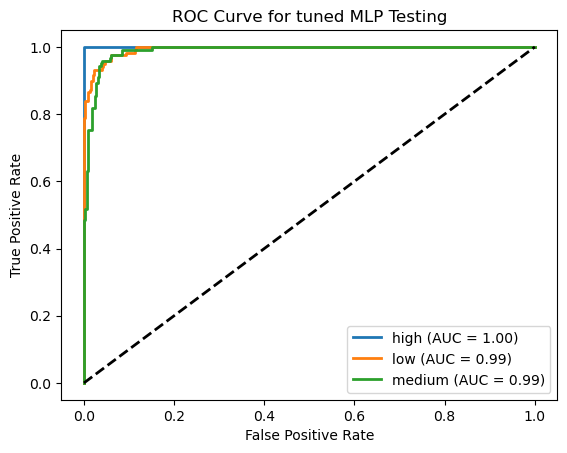

In [511]:
plot_roc_curve(best_mlp, X_test, y_test, label_encoder, 'ROC Curve for tuned MLP Testing')

## Model 2: Tuned ET

In [21]:
# {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6}

best_et = ExtraTreeClassifier( ccp_alpha=0.01, criterion='entropy',max_depth=17,max_features=None, min_samples_leaf=1,min_samples_split=6)

et.fit(X_test, y_test)
y_pred_test_et = et.predict(X_test)
acc_test_et = accuracy_score(y_test, y_pred_test_et)
print("ET testing accuracy score:\t\t\t {:.4f}".format(acc_test_et))
best_et.fit(X_test, y_test)
y_pred_test_best_et = best_et.predict(X_test)
acc_test_best_et = accuracy_score(y_test, y_pred_test_best_et)
print("Tuned ET testing accuracy score:\t\t {:.4f}".format(acc_test_best_et))

ET testing accuracy score:			 1.0000
Tuned ET testing accuracy score:		 0.9357


#### cross validation for tuned ET

In [32]:
et_test_cvc = cross_val_score(et, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("ET testing Scores: \n", et_test_cvc)
print(f"ET testing Scores Mean: {np.array(et_test_cvc).mean():.4f}")
best_et_test_cvc = cross_val_score(best_et, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("Tuned ET Testing Scores: \n", best_et_test_cvc)
print(f"Tuned ET Testing Scores Mean: {np.array(best_et_test_cvc).mean():.4f}")

ET testing Scores: 
 [0.68316656 0.67330623 0.68611111]
ET testing Scores Mean: 0.6809
Tuned ET Testing Scores: 
 [0.87082552 0.83449031 0.90555556]
Tuned ET Testing Scores Mean: 0.8703


confusion matrix

In [33]:
y_pred_cv_test_et = cross_val_predict(et, X_test, y_test, cv=3)
cm_test_et = confusion_matrix(y_test, y_pred_cv_test_et)
print("Confusion Matrix for ET test set:\n",cm_test_et)
y_pred_cv_test_best_et = cross_val_predict(best_et, X_test, y_test, cv=3)
cm_test_best_et = confusion_matrix(y_test, y_pred_cv_test_best_et)
print("Confusion Matrix for tuned ET test set:\n",cm_test_best_et)

Confusion Matrix for ET test set:
 [[153   8  19]
 [ 10  73  35]
 [ 28  24  70]]
Confusion Matrix for tuned ET test set:
 [[174   0   6]
 [  0 100  18]
 [  9  15  98]]


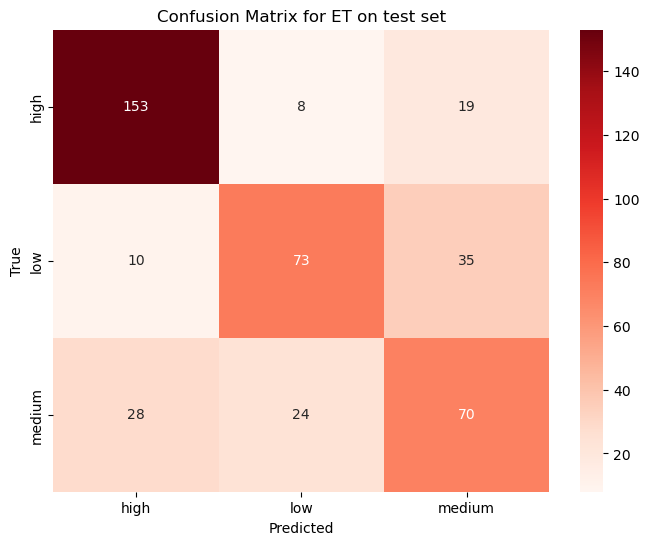

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_et)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ET on test set')
plt.show()

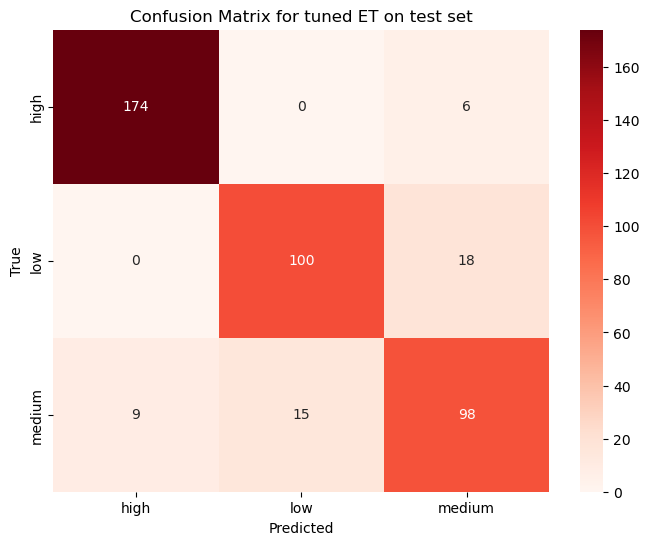

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_best_et)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for tuned ET on test set')
plt.show()

#### Tuned ET Accuracy Precision Recall and F1 on test set

In [518]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_test, y_pred_test_best_et, average='weighted')

print(f'Testing Weighted Precision for Tuned ET: {precision_train:.4f}')
print(f'Testing Weighted Recall for Tuned ET: {recall_train:.4f}')
print(f'Testing Weighted F1 Score for Tuned ET: {f1_train:.4f}')

Testing Weighted Precision for Tuned ET: 0.9353
Testing Weighted Recall for Tuned ET: 0.9333
Testing Weighted F1 Score for Tuned ET: 0.9340


#### PRC for ET test set

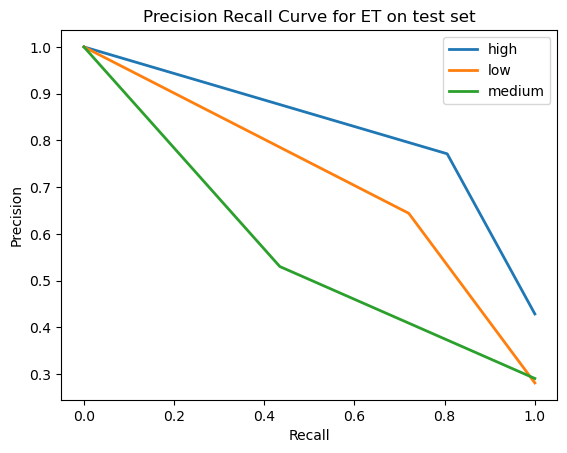

In [418]:
plot_precision_recall_curve(et,X_test, y_test, label_encoder, 'Precision Recall Curve for ET on test set')

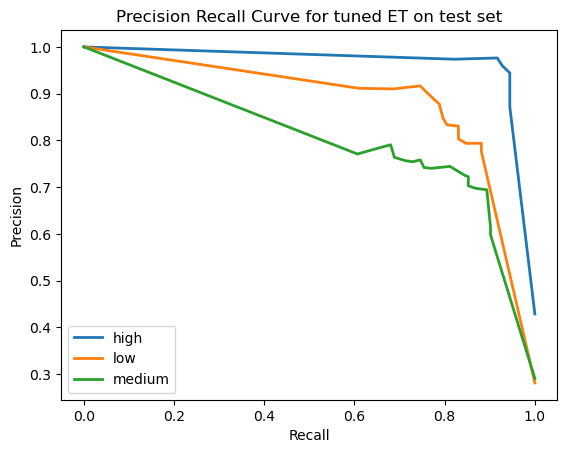

In [475]:
plot_precision_recall_curve(best_et,X_test, y_test, label_encoder, 'Precision Recall Curve for tuned ET on test set')

ROC

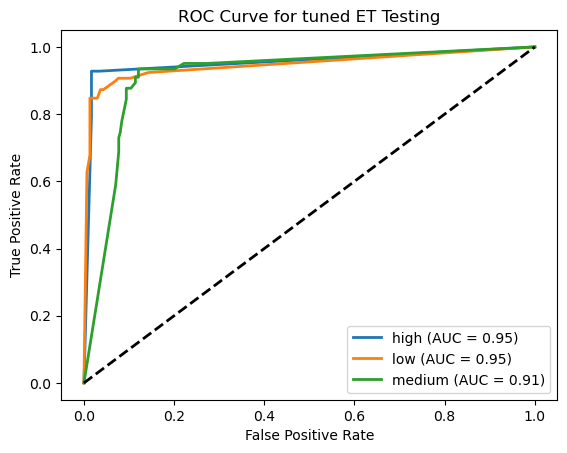

In [496]:
plot_roc_curve(best_et, X_test, y_test, label_encoder, 'ROC Curve for tuned ET Testing')

### Model 3: Tuned DT

In [457]:
# {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 19, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}
# ccp_alpha=0.01, criterion='gini',max_depth=13,max_features='sqrt',min_samples_leaf=2,min_samples_split=19, min_weight_fraction_leaf=0,splitter='best'
best_dt = DecisionTreeClassifier(ccp_alpha=0.01,criterion='gini',max_depth=13,min_samples_leaf=2,splitter='best',max_features=None)

dt.fit(X_test, y_test)
y_pred_test_dt = dt.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print("DT Testing accuracy score:\t\t\t {:.4f}".format(acc_test_dt))
best_dt.fit(X_test, y_test)
y_pred_test_best_dt = best_dt.predict(X_test)
acc_test_best_dt = accuracy_score(y_test, y_pred_test_best_dt)
print("Tuned DT Testing accuracy score:\t\t {:.4f}".format(acc_test_best_dt))

DT Testing accuracy score:			 1.0000
Tuned DT Testing accuracy score:		 0.9310


In [460]:
print("testing Report for tuned DT:\n",classification_report(y_test,y_pred_test_best_dt, target_names=label_encoder.classes_))

testing Report for tuned DT:
               precision    recall  f1-score   support

        high       0.98      0.96      0.97       180
         low       0.95      0.89      0.92       118
      medium       0.85      0.93      0.89       122

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



#### Cross Validation for DT  on Test set

In [520]:
dt_test_cvc = cross_val_score(dt, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("DT testing Scores: \n", dt_test_cvc)
print(f"DT testing Scores Mean: {np.array(dt_test_cvc).mean():.4f}")
best_dt_test_cvc = cross_val_score(best_dt, X_test, y_test, cv=3, scoring="balanced_accuracy") 
print("Tuned DT Testing Scores: \n", best_dt_test_cvc)
print(f"Tuned DT Testing Scores Mean: {np.array(best_dt_test_cvc).mean():.4f}")

DT testing Scores: 
 [0.82852825 0.86526996 0.89722222]
DT testing Scores Mean: 0.8637
Tuned DT Testing Scores: 
 [0.84221388 0.87937252 0.90833333]
Tuned DT Testing Scores Mean: 0.8766


#### Confusion Matrix for DT on Test set

In [423]:
y_pred_cv_test_dt = cross_val_predict(dt, X_test, y_test, cv=3)
cm_test_dt = confusion_matrix(y_test, y_pred_cv_test_dt)
print("Confusion Matrix for DT test set:\n",cm_test_dt)
y_pred_cv_test_best_dt = cross_val_predict(best_dt, X_test, y_test, cv=3)
cm_test_best_dt = confusion_matrix(y_test, y_pred_cv_test_best_dt)
print("Confusion Matrix for tuned DT test set:\n",cm_test_best_dt)

Confusion Matrix for DT test set:
 [[169   0  11]
 [  0 104  14]
 [ 12  16  94]]
Confusion Matrix for tuned DT test set:
 [[170   0  10]
 [  0 105  13]
 [ 10  15  97]]


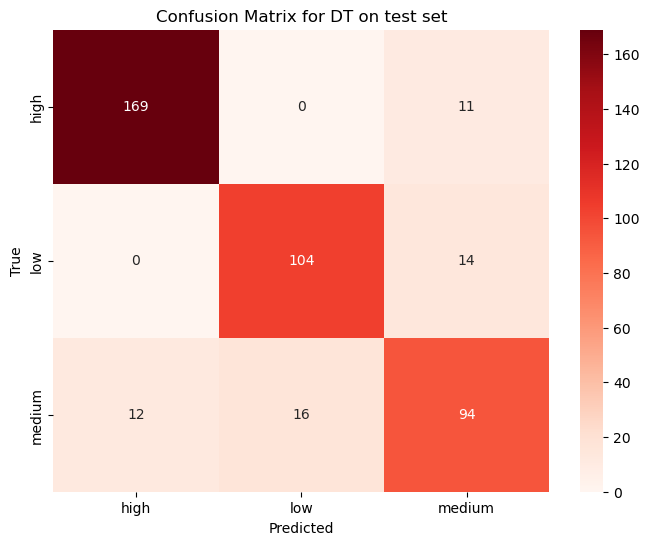

In [424]:
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DT on test set')
plt.show()

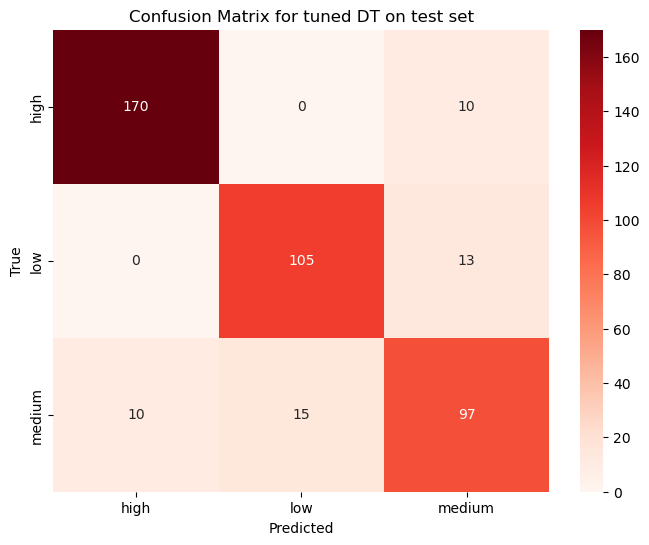

In [425]:
conf_matrix = confusion_matrix(y_test, y_pred_cv_test_best_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for tuned DT on test set')
plt.show()

#### Tuned DT Accuracy Precision Recall and F1

In [519]:
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_test, y_pred_test_best_dt, average='weighted')

print(f'Testing Weighted Precision for Tuned DT: {precision_train:.4f}')
print(f'Testing Weighted Recall for Tuned DT: {recall_train:.4f}')
print(f'Testing Weighted F1 Score for Tuned DT: {f1_train:.4f}')

Testing Weighted Precision for Tuned DT: 0.9338
Testing Weighted Recall for Tuned DT: 0.9310
Testing Weighted F1 Score for Tuned DT: 0.9316


#### PRC for DT  on Test set

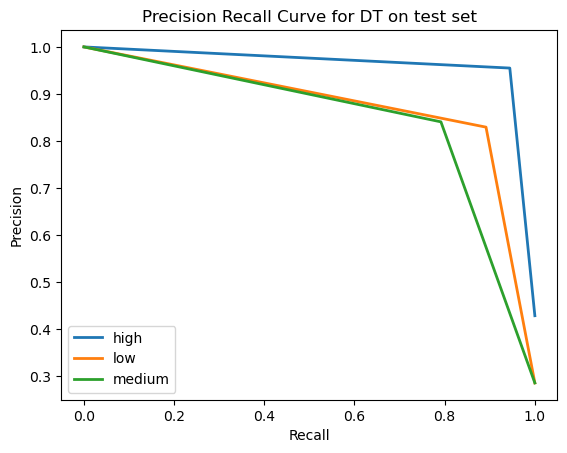

In [502]:
plot_precision_recall_curve(dt,X_test, y_pred_cv_test_best_dt, label_encoder, 'Precision Recall Curve for DT on test set')

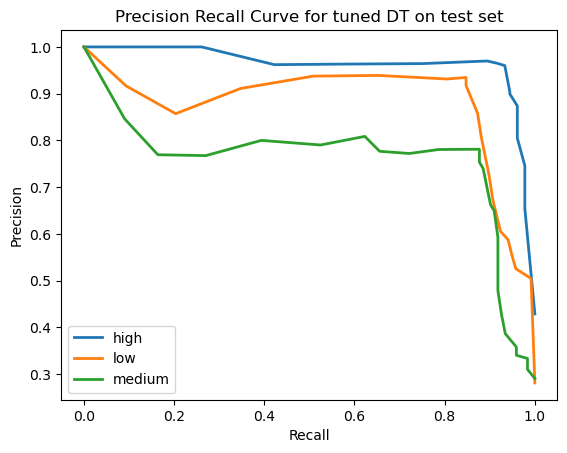

In [505]:
plot_precision_recall_curve(best_dt,X_test, y_test, label_encoder, 'Precision Recall Curve for tuned DT on test set')

### ROC for tuned DT

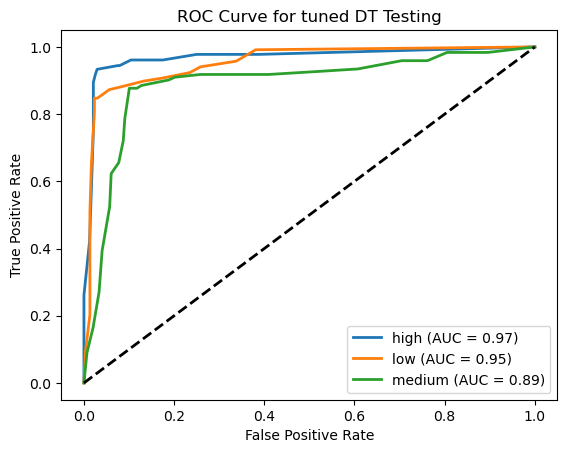

In [510]:
plot_roc_curve(best_dt, X_test, y_test, label_encoder, 'ROC Curve for tuned DT Testing')

# Feature importance

In [36]:
feature_importances = gsearch_et.best_estimator_.feature_importances_
attributes = x_train_num.columns.tolist() + list(label_encoder.classes_)
feature_list = sorted(zip(feature_importances, attributes), reverse=True)
feature_list

[(0.6089211768266463, 'Weight(kg)'),
 (0.07783901265755991, 'Height(cm)'),
 (0.06053693679058666, 'low'),
 (0.02362705063065829, 'high'),
 (0.0, 'medium'),
 (0.0, 'Water_intake(L)'),
 (0.0, 'Vege_day'),
 (0.0, 'Meals_day'),
 (0.0, 'Income'),
 (0.0, 'Exercise'),
 (0.0, 'Age')]

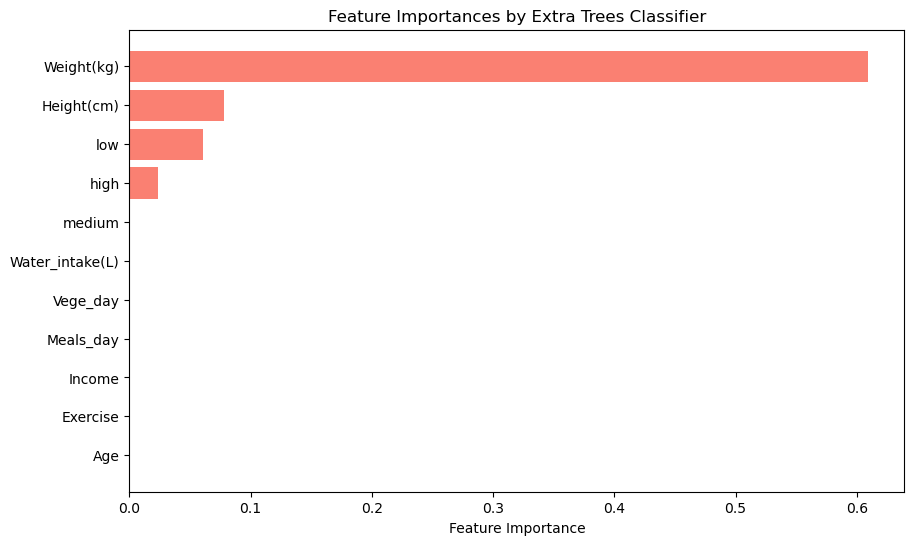

In [37]:
feature_importances, attributes = zip(*feature_list)  

plt.figure(figsize=(10, 6))  
plt.barh(attributes, feature_importances, color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importances by Extra Trees Classifier')

plt.gca().invert_yaxis()

plt.show()